In [1]:
import kchannel

In [2]:
coor = "/home/clam/projects/Markov/kchannel/start.gro"
trajs = ["/home/clam/projects/Markov/kchannel/0/traj.xtc", 
         "/home/clam/projects/Markov/kchannel/1/traj.xtc"]

In [3]:
_ = kchannel.detectSF(coor)

idx	layer	chain	resid	resname	name
670	4	0	59	THR	OG1
1973	4	1	59	THR	OG1
3276	4	2	59	THR	OG1
4579	4	3	59	THR	OG1
677	3	0	59	THR	O
1980	3	1	59	THR	O
3283	3	2	59	THR	O
4586	3	3	59	THR	O
693	2	0	60	VAL	O
1996	2	1	60	VAL	O
3299	2	2	60	VAL	O
4602	2	3	60	VAL	O
700	1	0	61	GLY	O
2003	1	1	61	GLY	O
3306	1	2	61	GLY	O
4609	1	3	61	GLY	O
721	0	0	62	TYR	O
2024	0	1	62	TYR	O
3327	0	2	62	TYR	O
4630	0	3	62	TYR	O


In [4]:
for traj in trajs:
    _ = kchannel.run(coor, traj, CADistance=True, ignoreS0ScavJump=True)

Reading trajectory
Finished processing frame 25000 / 25001 
Double occupancy is found in 14 frames. Check log file for details.
Total time: 500.000000 ns
dt: 0.020000 ns
Number of K+: 148
Number of water: 7272
Number of net water permeation = 0
Number of net ion permeation = 48
Current = 15.37920 pA
Results saved to /home/clam/projects/Markov/kchannel/0/results.csv
Log saved to /home/clam/projects/Markov/kchannel/0/results.log
Total execution time: 118.44775 s


Reading trajectory
Finished processing frame 25000 / 25001 
Double occupancy is found in 8 frames. Check log file for details.
Total time: 500.000000 ns
dt: 0.020000 ns
Number of K+: 148
Number of water: 7272
Number of net water permeation = 0
Number of net ion permeation = 40
Current = 12.81600 pA
Results saved to /home/clam/projects/Markov/kchannel/1/results.csv
Log saved to /home/clam/projects/Markov/kchannel/1/results.log
Total execution time: 117.48461 s




In [5]:
# location of the directories containing the trajectories
locations = ["/home/clam/projects/Markov/kchannel/0",
             "/home/clam/projects/Markov/kchannel/1"
            ]
channel = kchannel.loadResults(locations)
stats_df, states_df = kchannel.computeStats(channel, save='./stats.csv')
stats_df

Current (pA): 14.098	12.816 - 14.098

Stats saved to /home/clam/projects/Markov/kchannel/stats.csv


/home/clam/softs/anaconda3/lib/python3.9/site-packages/scipy/stats/_bootstrap.py:100: RuntimeWarning: invalid value encountered in double_scalars
  a_hat = num / den


,T (ns),dt (ns),current (pA),C0K0KW,WKK0KW,WK0KWC,C0K0KC,CK0KWC,WKK0KC,C0KKWW,...,C0K0K0,K0KK0W,C0K0WC,K0KK0C,KK0KWC,CK0K0K,CK0KK0,CK0KKC,CKK0WC,0K0K0C
0,500.0,0.02,15.3792,0.268109,0.283669,0.267829,0.049278,0.032839,0.023719,0.010680,...,0.00004,0.00000,0.00004,0.00000,0.00004,0.00000,0.00004,0.00004,0.00004,0.00000
1,500.0,0.02,12.8160,0.392024,0.312148,0.142034,0.048078,0.018839,0.018439,0.015839,...,0.00000,0.00004,0.00000,0.00004,0.00000,0.00004,0.00000,0.00000,0.00000,0.00004


34-th cycle between is discarded as WKK0KW is not found
35-th cycle between is discarded as WKK0KW is not found
39-th cycle between is discarded as WKK0KW is not found
40-th cycle between is discarded as WKK0KW is not found
Total permeation events: 48
Identified cycles: 43
Total permeation events: 40
Identified cycles: 39


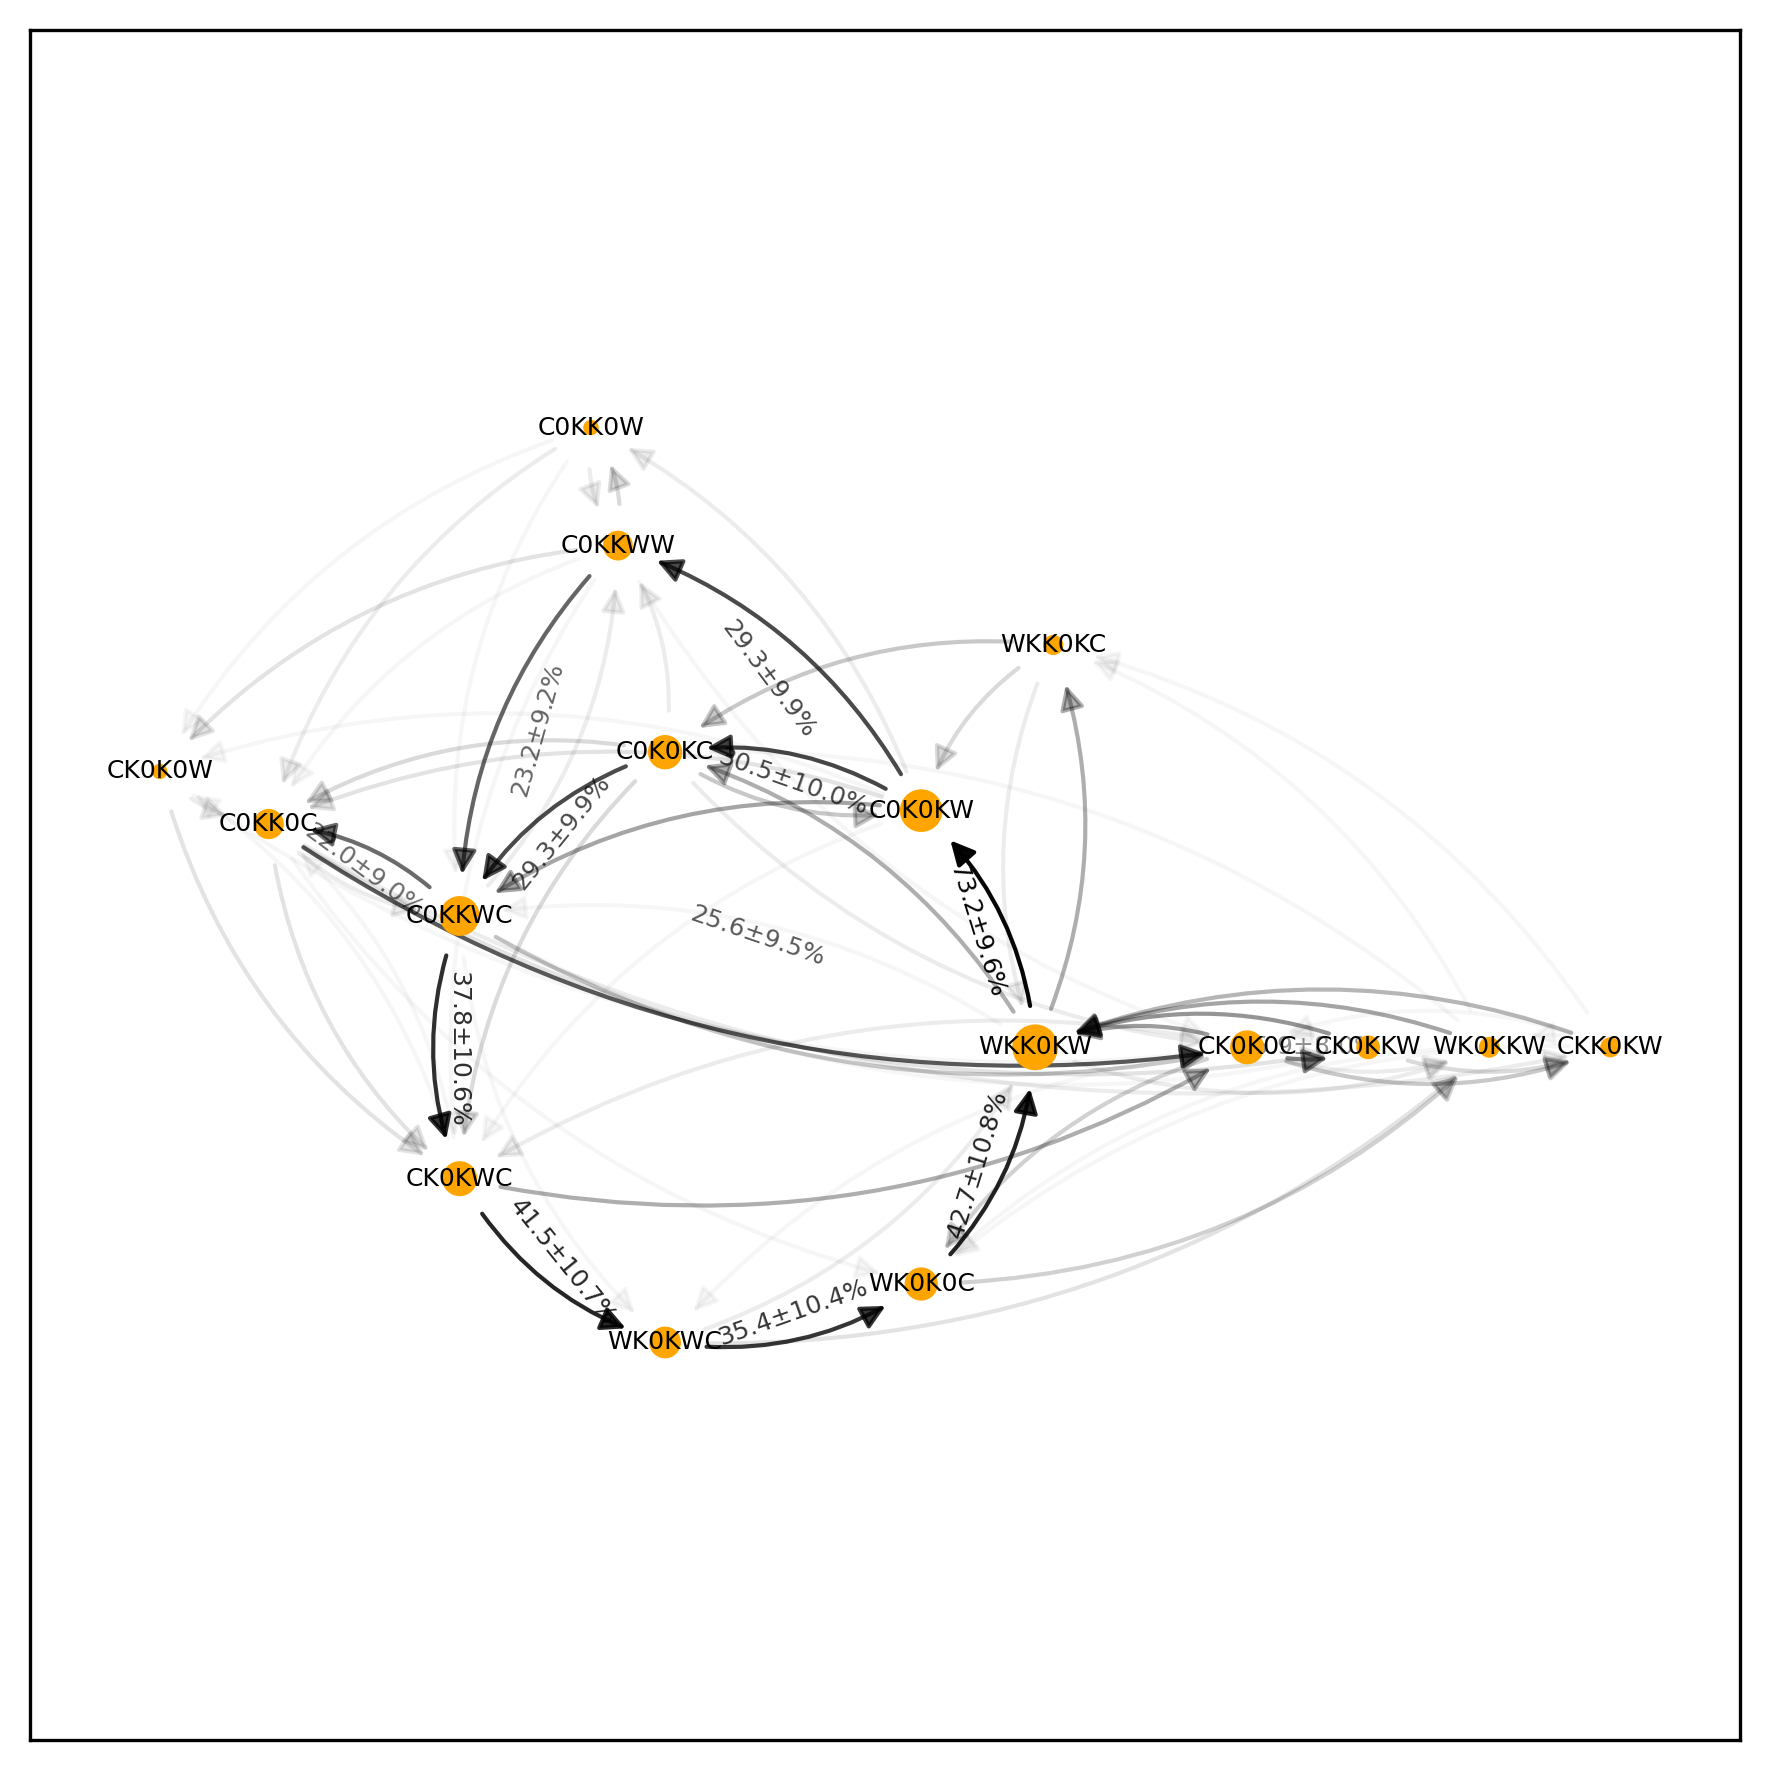

,initial,final,mean (ns),low (ns),high (ns),n,k_f,w_f
0,WKK0KW,C0K0KW,0.216110,0.204701,0.229155,1563,1.0,0.0
1,C0K0KW,C0K0KC,0.502179,0.456822,0.561188,1184,0.0,0.0
2,C0K0KC,C0KKWC,5.345263,3.925416,7.169644,76,1.0,1.0
3,C0KKWC,CK0KWC,1.157647,0.153725,4.600678,51,1.0,0.0
4,CK0KWC,WK0KWC,0.330476,0.236190,0.449048,42,0.0,0.0
5,WK0KWC,WK0K0C,2.902034,2.250847,3.931658,59,0.0,-1.0
6,WK0K0C,WKK0KW,0.648217,0.377829,1.087768,129,2.0,0.0


In [6]:
channel.cycles_6_all, _ = kchannel.findCycles(channel.occupancy_6_all, channel.jumps_all, 'WKK0KW', n_bs_jump=4)
cycleProbs_6, mainPath = kchannel.plotCycles(channel.cycles_6_all, state_threshold=.01, 
                                  label_threshold=0.15, offset=0.7, scale=0.4, figsize=(6,6),
                                  returnCycleProb=True, returnMainPath=True)
df = kchannel.permeationMFPT(channel.occupancy_6_all, channel.jumps_all, mainPath, n_bs_jump=4)
df